In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# machine learning lib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train = pd.read_csv("h-p-train.csv")
data_train.drop(["Id", "Street", "Alley", "PoolQC", "Fence", "MiscFeature"], inplace = True, axis = 1)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [3]:
# visualization of the SalePrice
data_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

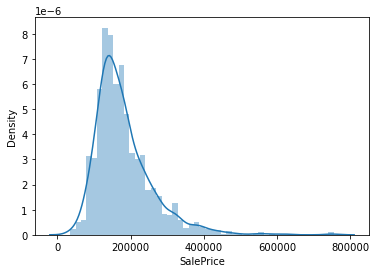

In [4]:
sns.distplot(data_train.SalePrice)

<Figure size 432x288 with 0 Axes>

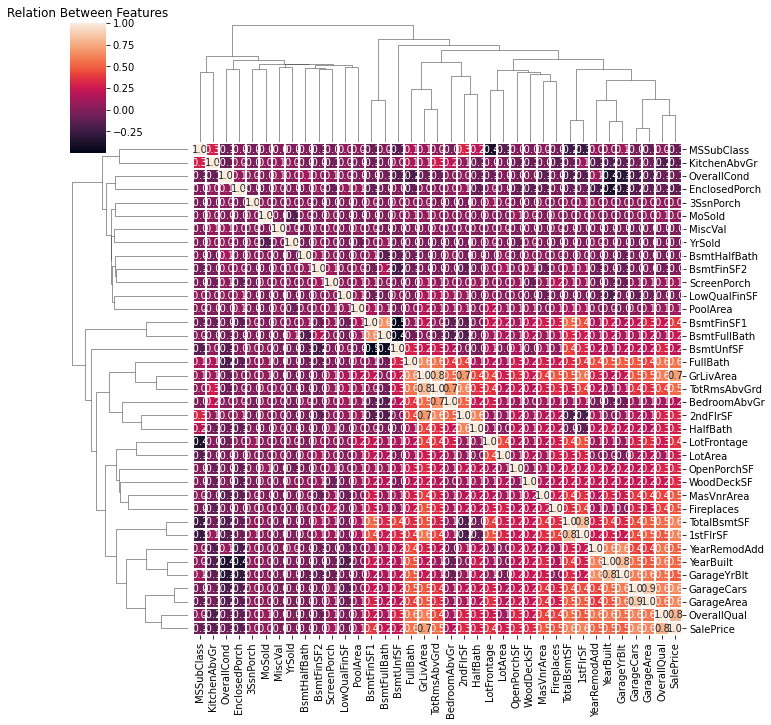

In [5]:
corr_matrix = data_train.corr()
plt.figure()
sns.clustermap(corr_matrix, annot = True, fmt = ".1f", linewidths = 0.1)
plt.title("Relation Between Features")
plt.show()

By this correlation table we can observe the SalePrice - related fetures, I also set threshold to limit most related fetures.

<Figure size 432x288 with 0 Axes>

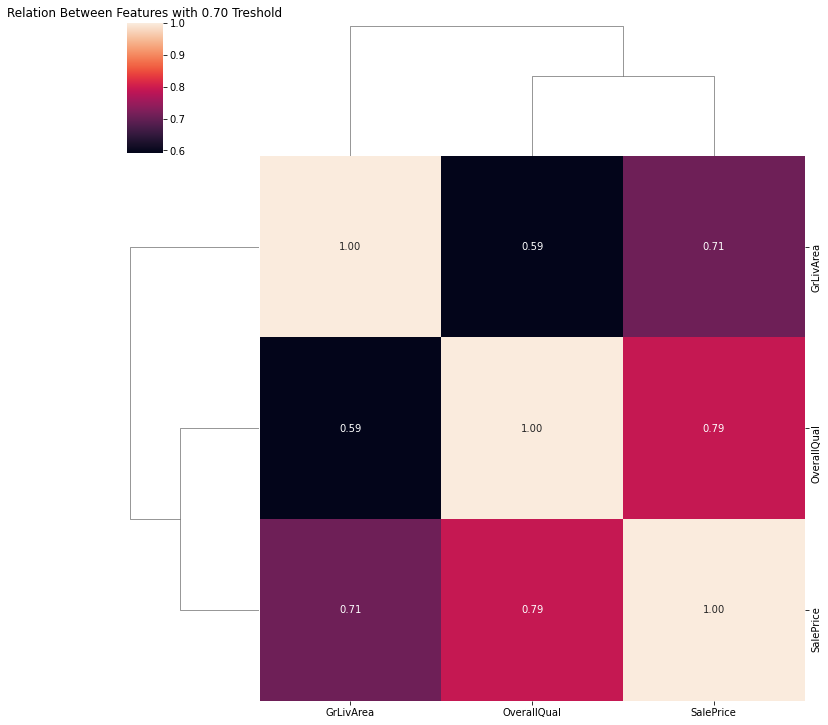

In [6]:
# simplify the outcome
treshold = 0.70
filter_ = np.abs(corr_matrix["SalePrice"]) > treshold
corr_features = corr_matrix.columns[filter_].tolist()
plt.figure()
sns.clustermap(data_train[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Relation Between Features with 0.70 Treshold")
plt.show()

Arrange the training data with related features to create accurate model.

In [7]:
data_train = data_train[["OverallQual", "GrLivArea", "SalePrice"]]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   SalePrice    1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [11]:
data = data_train.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


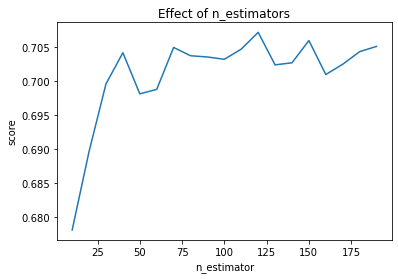

In [12]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_jobs = -1)


estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    regressor.set_params(n_estimators=n)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [13]:
scores

[0.6780523484496496,
 0.6896277793296033,
 0.6995697699123731,
 0.7041585726998464,
 0.6981036536301037,
 0.6987591995237991,
 0.7049330868162412,
 0.7037135432335366,
 0.7035288077337044,
 0.7031900367438231,
 0.7046892708130101,
 0.7071595119419158,
 0.7023704483296453,
 0.7026738113035955,
 0.7059534026274985,
 0.7009473456145913,
 0.7024632064386906,
 0.7043116584344172,
 0.7050889188149037]

Data accuracy ~70.7%